In [ ]:
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups

import gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import download

# Download necessary NLTK data
download('punkt')
download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Getting dataset
with open('dataset_English.txt', encoding='utf-8', errors='ignore') as f:
  texts = f.readlines()

# Automatic topic generation

In [ ]:
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess(document):
    document = document.lower()
    # Remove all non-word characters and tokenize the text
    words = word_tokenize(re.sub(r'[^a-zA-Z\s]', '', document))
    # Remove stopwords and lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words if word not in STOPWORDS]
    return words

# Assuming 'documents' is a list of strings representing your text data
# Preprocess the documents
processed_docs = [preprocess(doc) for doc in texts]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Apply LDA
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# View the topics
topics = lda_model.print_topics()
lst=[]
for topic in topics:
    print(topic)
    lst.append(topic[1].split(' + '))

(0, '0.029*"period" + 0.023*"menstrual" + 0.015*"bleeding" + 0.012*"risk" + 0.012*"heavy" + 0.010*"body" + 0.009*"pad" + 0.009*"painful" + 0.008*"uterus" + 0.007*"woman"')
(1, '0.061*"period" + 0.033*"question" + 0.023*"pain" + 0.018*"cramp" + 0.017*"help" + 0.016*"feel" + 0.015*"day" + 0.013*"normal" + 0.013*"having" + 0.013*"ask"')
(2, '0.027*"infection" + 0.022*"menstrual" + 0.015*"vagina" + 0.013*"transmitted" + 0.012*"cause" + 0.011*"sexually" + 0.011*"condition" + 0.011*"provider" + 0.010*"blood" + 0.010*"important"')
(3, '0.043*"period" + 0.035*"pad" + 0.023*"menstruation" + 0.020*"menstrual" + 0.015*"important" + 0.014*"help" + 0.013*"underwear" + 0.009*"irregular" + 0.008*"change" + 0.008*"body"')
(4, '0.029*"cycle" + 0.025*"vaginal" + 0.022*"period" + 0.018*"discharge" + 0.017*"menstrual" + 0.015*"menopause" + 0.015*"change" + 0.013*"time" + 0.012*"perimenopause" + 0.011*"tissue"')
(5, '0.036*"period" + 0.032*"blood" + 0.014*"feel" + 0.013*"ovulation" + 0.013*"cycle" + 0.011*

In [ ]:
# print(lst)
autoTopics=[]
for ele in lst:
  topic = []
  for word in ele:
    # print(word.split('*'))
    if float(word.split('*')[0]) >= 0.01:
      topic.append(word.split('*')[1][1:-1])
  autoTopics.append(topic)
  print(topic)

# print(autoTopics)
# print(len(autoTopics))

['period', 'menstrual', 'bleeding', 'risk', 'heavy', 'body']
['period', 'question', 'pain', 'cramp', 'help', 'feel', 'day', 'normal', 'having', 'ask']
['infection', 'menstrual', 'vagina', 'transmitted', 'cause', 'sexually', 'condition', 'provider', 'blood', 'important']
['period', 'pad', 'menstruation', 'menstrual', 'important', 'help', 'underwear']
['cycle', 'vaginal', 'period', 'discharge', 'menstrual', 'menopause', 'change', 'time', 'perimenopause', 'tissue']
['period', 'blood', 'feel', 'ovulation', 'cycle', 'color', 'fluid', 'people', 'discharge', 'time']
['day', 'menopause', 'period', 'age', 'bye', 'ovulation', 'cycle']
['hello', 'help', 'today', 'hi', 'period', 'polyp', 'like', 'mai', 'hormonal', 'symptom']
['period', 'hormone', 'cycle', 'menstrual', 'day', 'symptom', 'woman', 'level', 'pm', 'mood']
['period', 'fibroid', 'uterine', 'pain', 'know', 'spotting', 'cause']


# Manually finding topics

In [ ]:
topics = [
    ['periods', 'menstruation', 'menstrual cycle', 'hormones'], # 1. periods
    ['pregnancy', 'infertility', 'discharge', 'ovulation'], # 2. infertility
    ['myth', 'exercise', 'dirty', 'contagious', 'food', 'touch', 'shower'], # 5. Myth
    ['PCOS', 'PCOD', 'STI', 'STD', 'infection'], # 6. std and 3. common disease
    ['pad', 'tampon', 'menstrual cup','blood'], # 4. MHM
    ['cramps', 'symptoms', 'PMS', 'sad', 'craving', 'mood swings'] # 3. common disease
]
# topics = autoTopics

# Topic Coherence

In [ ]:
# https://towardsdatascience.com/understanding-topic-coherence-measures-4aa41339634c

# Processing dataset for
tokenizer = lambda s: re.findall( '\w+', s.lower() )
tokenText = [ tokenizer(t) for t in  texts ]
print(tokenText)

# Creating a dictionary with the vocabulary
word2id = Dictionary( tokenText )

# Coherence model
cmManual = CoherenceModel(topics=topics,
                    texts=tokenText,
                    coherence='c_v',
                    dictionary=word2id)

coherence_per_topic = cmManual.get_coherence_per_topic()

[['hello', 'hi', 'how', 'can', 'i', 'help', 'you', 'today'], ['can', 'i', 'ask', 'you', 'a', 'question', 'yes', 'sure'], ['what', 'is', 'your', 'name', 'my', 'name', 'is', 'mai'], ['what', 'does', 'that', 'mean', 'mai', 'literally', 'means', 'an', 'old', 'woman', 'in', 'several', 'subcontinent', 'languages', 'including', 'sindhi', 'hindi', 'and', 'marathi', 'it', 'is', 'sometimes', 'used', 'to', 'refer', 'to', 'a', 'mother', 'but', 'in', 'general', 'it', 'means', 'a', 'brave', 'or', 'experienced', 'woman'], ['does', 'that', 'mean', 'you', 'are', 'old', 'depends', 'on', 'what', 'you', 'consider', 'old', 'but', 'i', 'consider', 'myself', 'to', 'be', 'middle', 'aged'], ['how', 'old', 'are', 'you', 'i', 'am', '50', 'years', 'of', 'age'], ['where', 'are', 'you', 'from', 'mai', 'i', 'am', 'from', 'sukkur'], ['do', 'you', 'live', 'there', 'yes'], ['i', 'am', 'from', 'sukkur', 'as', 'well', 'it', 'is', 'a', 'beautiful', 'place'], ['i', 'am', 'from', 'larkana', 'it', 'is', 'a', 'beautiful', 'pl

## Representing in a Heatmap

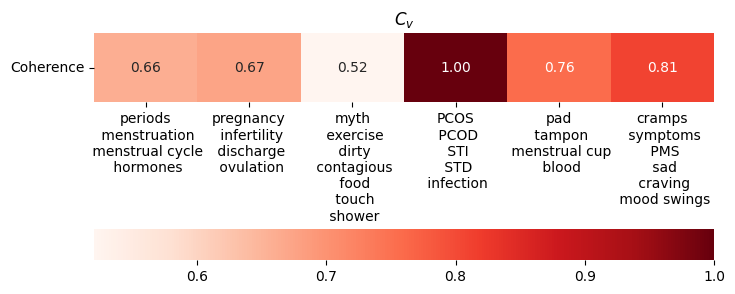

In [ ]:
topics_str = [ '\n '.join(t) for t in topics ]
data_topic_score = pd.DataFrame( data=zip(topics_str, coherence_per_topic), columns=['Topic', 'Coherence'] )
data_topic_score = data_topic_score.set_index('Topic')

fig, ax = plt.subplots( figsize=(8,3) )
ax.set_title("$C_v$")
# Use the 'orient' parameter to make the heatmap horizontal
sns.heatmap(data=data_topic_score.T, annot=True, square=False, cmap='Reds', fmt='.2f',
            linecolor='black', ax=ax, cbar_kws={'orientation': 'horizontal', 'pad': 0.55})
plt.yticks( rotation=0 )
ax.set_xlabel('')
ax.set_ylabel('')
fig.show()